# 自定义坐标轴刻度

In [164]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

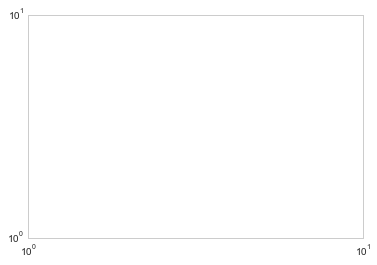

In [170]:
#每个主要刻度都显示为一个较大的刻度线和标签，而次要刻度都显示为一个较小
#的刻度线，且不显示标签
ax = plt.axes(xscale='log', yscale='log') 
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

### 隐藏刻度与标签

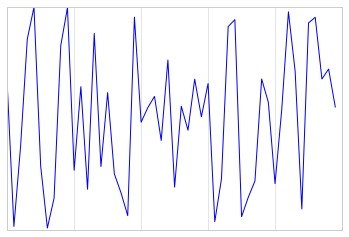

In [178]:
ax=plt.axes()
ax.plot(np.random.rand(50))
ax.yaxis.set_major_locator(plt.NullLocator())#移除y轴刻度
ax.xaxis.set_major_formatter(plt.NullFormatter())#移除x轴标签

### 增减刻度数量

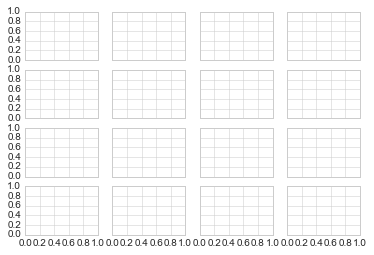

In [180]:
fig,ax=plt.subplots(4,4,sharex=True,sharey=True)

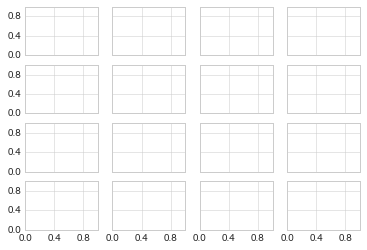

In [183]:
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

### 花哨的刻度格式

(0, 9.42477796076938)

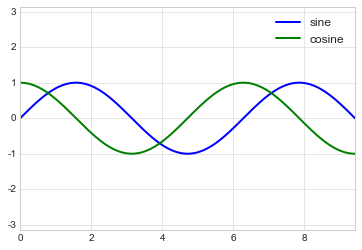

In [191]:
fig,ax=plt.subplots()
x=np.linspace(0,3*np.pi,1000)
ax.plot(x,np.sin(x),lw=2,label='sine')
ax.plot(x,np.cos(x),lw=2,label='cosine')
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0,3*np.pi)

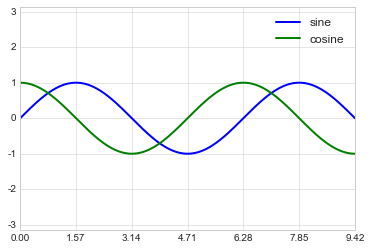

In [195]:
#将刻度画在pi的倍数上
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi/4))
fig

In [207]:
#用刻度生成器修改刻度格式
def format_fun(value,tick_number):
    N=int(np.round(2*value/np.pi))
    if(N==0):
        return "0"
    elif N==1:
        return r"$\pi/2$"
    elif N==2:
        return r"$\pi$"
    elif N%2>0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N//2)

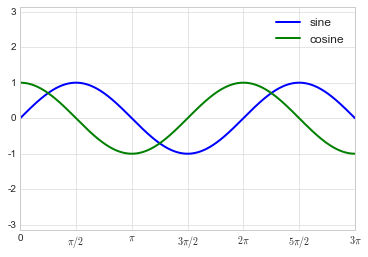

In [208]:
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_fun))
fig

# 自定义：配置文件与样式表

### 样式表

In [253]:
import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline


In [248]:
plt.style.available[:]



['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [270]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1,2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a','b','c'],loc='lower left')

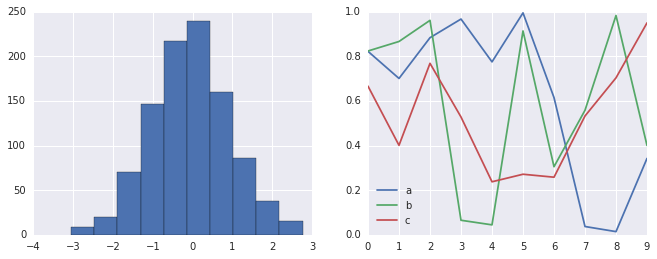

In [294]:
with plt.style.context('seaborn'):
    hist_and_lines()

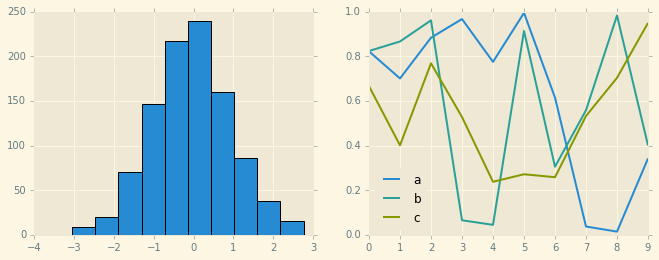

In [295]:
with plt.style.context('Solarize_Light2'):
    hist_and_lines()

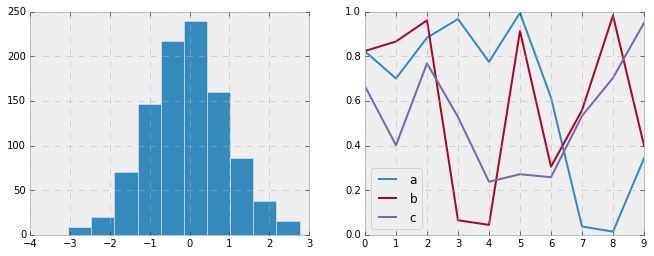

In [274]:
with plt.style.context('bmh'):
    hist_and_lines()

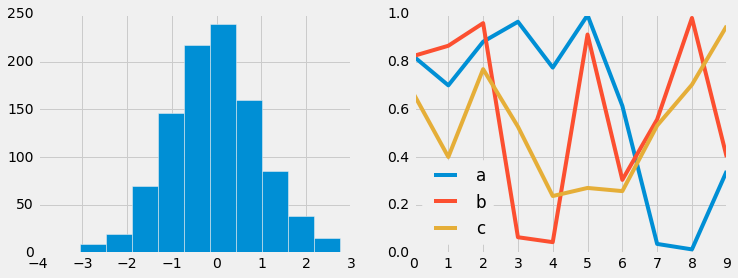

In [277]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

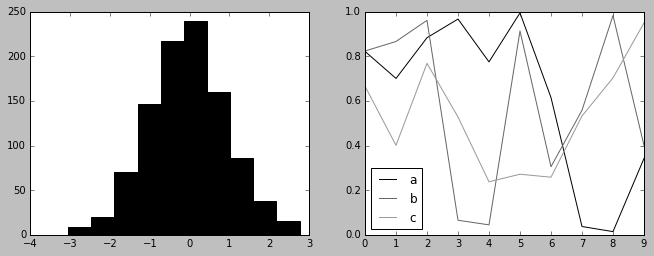

In [279]:
with plt.style.context('grayscale'):
    hist_and_lines()

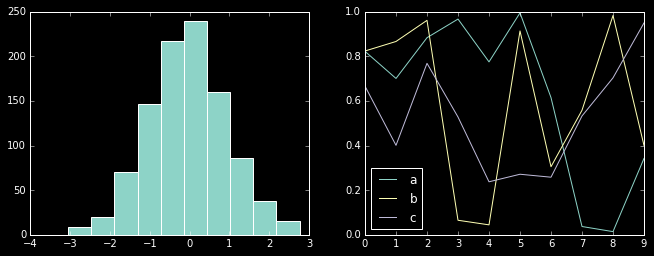

In [299]:
with plt.style.context('dark_background'):
    hist_and_lines()

# 用matplotlib画三维图

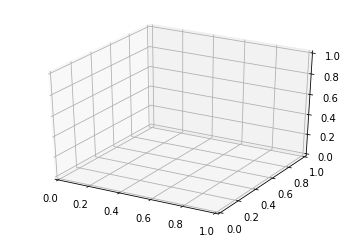

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax = plt.axes(projection='3d')

### 三维数据点与线

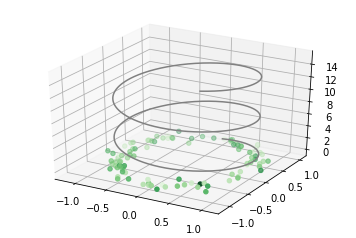

In [10]:
ax=plt.axes(projection='3d')
#三维线
zline=np.linspace(0,15,1000)
xline=np.sin(zline)
yline=np.cos(zline)
ax.plot3D(xline,yline,zline,'gray')
#三维散点
zdata=15*np.random.randn(100)
xdata=np.sin(zdata)+0.1*np.random.randn(100)
ydata=np.cos(zdata)+0.1*np.random.randn(100)
ax.scatter3D(xdata,ydata,c=zdata,cmap='Greens')


### 三维等高线图

In [11]:
def f(x,y):
    return np.sin(np.sqrt(x**2+y**2))
x=np.linspace(-6,6,30)
y=np.linspace(-6,6,30)
X,Y=np.meshgrid(x,y)
Z=f(X,Y)


Text(0.5,0,'z')

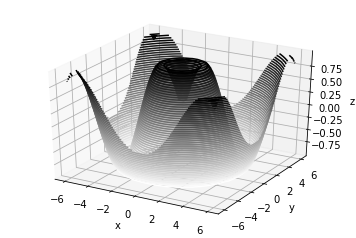

In [12]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.contour3D(X,Y,Z,50,cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

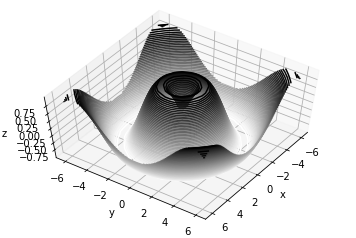

In [13]:
#可以调整角度
ax.view_init(60,35)
fig

### 线框图和曲面图

Text(0.5,0.92,'wireframe')

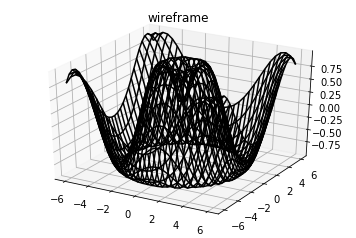

In [14]:
#线框图
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z,color='black')
ax.set_title('wireframe')

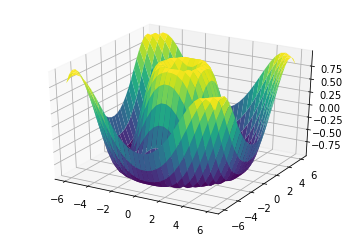

In [19]:
#曲面图
ax=plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap='viridis',edgecolor='none')